In [1]:
import pandas as pd
import numpy as np
from tools import *
import os
import preprocessor

In [2]:
df = pd.read_csv('data/diabetic_data.csv')

In [3]:

preprocessor_eda=preprocessor.Train_preprocessor('data/mapping_json')
df=preprocessor_eda.transform_eda(df)


c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'] = df['diag_1'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'] = df['diag_2'].map(d).astype(int)
c:\Users\mario\OneDrive\Documentos\TAAU\TAAU\preprocessor.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [4]:
import pandas as pd
import numpy as np

# Suponiendo que df es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta la ruta del archivo si es necesario

# Reemplaza 'NULL', 'null', y '?' con np.nan
df.replace(['NULL', 'null', '?'], np.nan, inplace=True)

# Calcula el porcentaje de valores nulos en cada columna
porcentaje_nulos = df.isnull().mean() * 100

# Filtra y muestra las columnas con más del 10% de valores nulos
columnas_con_nulos_altos = porcentaje_nulos[porcentaje_nulos > 10]

if not columnas_con_nulos_altos.empty:
    print("Columnas con más del 10% de valores nulos:")
    print(columnas_con_nulos_altos)
else:
    print("No hay columnas con más del 10% de valores nulos.")
df=df.drop(columns=['weight','medical_specialty'])

Columnas con más del 10% de valores nulos:
weight               95.970555
medical_specialty    48.558370
dtype: float64


In [5]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,n_service_uses,sqrt_n_service_uses,medication/day
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency Room,2,11,5,13,...,No,No,No,No,No,Yes,2,3,1.732051,6.500000
3,Caucasian,1,35,Emergency,Discharged to home,Emergency Room,2,44,1,16,...,No,No,No,No,Ch,Yes,2,0,0.000000,8.000000
4,Caucasian,1,45,Emergency,Discharged to home,Emergency Room,1,51,0,8,...,No,No,No,No,Ch,Yes,2,0,0.000000,8.000000
6,Caucasian,1,65,Elective,Discharged to home,Clinic Referral,4,70,1,21,...,No,No,No,No,Ch,Yes,2,0,0.000000,5.250000
8,Caucasian,0,85,Urgent,Discharged to home,Transfer from a hospital,13,68,2,28,...,No,No,No,No,Ch,Yes,2,0,0.000000,2.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101342,Caucasian,0,75,Urgent,Discharged/transferred to home with home healt...,Physician Referral,5,52,1,24,...,No,No,No,No,Ch,Yes,0,1,1.000000,4.800000
101386,Caucasian,1,75,Urgent,Discharged to home,Physician Referral,4,20,0,19,...,No,No,No,No,Ch,Yes,0,0,0.000000,4.750000
101391,Caucasian,1,45,Emergency,Discharged/transferred to home with home healt...,Emergency Room,5,64,0,19,...,No,No,No,No,No,Yes,0,5,2.236068,3.800000
101667,Caucasian,1,75,Emergency,Discharged/transferred to SNF,Emergency Room,4,37,0,7,...,No,No,No,No,Ch,Yes,0,0,0.000000,1.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70233 entries, 2 to 101732
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      68358 non-null  object 
 1   gender                    70233 non-null  int32  
 2   age                       70233 non-null  int64  
 3   admission_type_id         65734 non-null  object 
 4   discharge_disposition_id  67795 non-null  object 
 5   admission_source_id       65372 non-null  object 
 6   time_in_hospital          70233 non-null  int64  
 7   num_lab_procedures        70233 non-null  int64  
 8   num_procedures            70233 non-null  int64  
 9   num_medications           70233 non-null  int64  
 10  diag_1                    70233 non-null  int32  
 11  diag_2                    70233 non-null  int32  
 12  diag_3                    70233 non-null  int32  
 13  number_diagnoses          70233 non-null  int64  
 14  max_g

# Variables review

## race

In [7]:
print(df['race'].value_counts())
print(df['race'].isnull().sum())
df=df.dropna(subset='race')

Caucasian          52638
AfricanAmerican    12611
Hispanic            1469
Other               1157
Asian                483
Name: race, dtype: int64
1875


## time in hospital

In [8]:
print(df['time_in_hospital'].value_counts())
print(df['time_in_hospital'].isnull().sum())

3     12096
2     11719
1     10088
4      9163
5      6611
6      4986
7      3865
8      2828
9      1929
10     1517
11     1203
12      933
13      774
14      646
Name: time_in_hospital, dtype: int64
0


# num_lab_procedures        

1      2185
43     1837
44     1586
45     1562
46     1481
       ... 
107       1
120       1
121       1
118       1
132       1
Name: num_lab_procedures, Length: 116, dtype: int64
0


<Axes: >

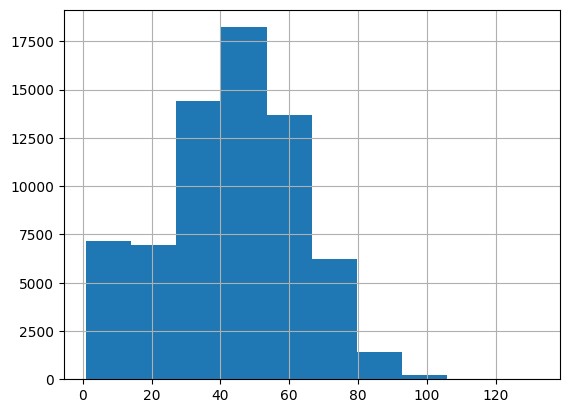

In [9]:
print(df['num_lab_procedures'].value_counts())
print(df['num_lab_procedures'].isnull().sum())      
df['num_lab_procedures'].hist()

## diag

In [10]:
print(df['diag_1'].value_counts())
print(df['diag_1'].isnull().sum())   

6     21124
2      6928
7      6490
8      6155
15     5341
16     4545
12     3875
9      3376
1      2632
0      1760
11     1711
4      1450
18      894
5       842
3       643
10      551
13       40
17        1
Name: diag_1, dtype: int64
0


In [11]:
print(df['diag_2'].value_counts())
print(df['diag_2'].isnull().sum())   

6     21558
2     14395
7      6572
9      5053
15     3128
8      2659
11     2153
3      2046
16     1775
4      1773
1      1707
12     1251
0      1238
18     1176
5       892
17      559
10      345
13       78
Name: diag_2, dtype: int64
0


In [12]:
print(df['diag_3'].value_counts())
print(df['diag_3'].isnull().sum())   

6     20487
2     18685
7      4351
9      3825
15     3051
18     2558
8      2426
4      2102
3      1715
11     1497
16     1392
12     1332
1      1233
5      1229
0      1225
17      911
10      268
13       71
Name: diag_3, dtype: int64
0


In [13]:
df=df.dropna(subset=['diag_1','diag_2','diag_3'])

## Medications

In [14]:
for i in df.columns[16:39]:
    print(df[i].value_counts())
    print(df[i].isnull().sum()) 

No        54032
Steady    13120
Up          793
Down        413
Name: metformin, dtype: int64
0
No        67448
Steady      811
Up           70
Down         29
Name: repaglinide, dtype: int64
0
No        67870
Steady      464
Up           16
Down          8
Name: nateglinide, dtype: int64
0
No        68289
Steady       64
Up            4
Down          1
Name: chlorpropamide, dtype: int64
0
No        64782
Steady     3219
Up          226
Down        131
Name: glimepiride, dtype: int64
0
No        68357
Steady        1
Name: acetohexamide, dtype: int64
0
No        59593
Steady     7836
Up          566
Down        363
Name: glipizide, dtype: int64
0
No        60843
Steady     6516
Up          601
Down        398
Name: glyburide, dtype: int64
0
No        68340
Steady       18
Name: tolbutamide, dtype: int64
0
No        63253
Steady     4853
Up          173
Down         79
Name: pioglitazone, dtype: int64
0
No        63830
Steady     4324
Up          132
Down         72
Name: rosiglitazone,

In [15]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# df = pd.read_csv('tu_archivo.csv')  # Descomenta y ajusta la ruta del archivo si es necesario

# Umbral para considerar una distribución desbalanceada (p. ej., 80%)
umbral_desbalance = 0.8

# Identifica y elimina las columnas con distribuciones desbalanceadas
columnas_a_eliminar = []
for columna in df.columns:
    max_freq = df[columna].value_counts(normalize=True).max()
    if max_freq > umbral_desbalance:
        columnas_a_eliminar.append(columna)
        print(f"Columna '{columna}' eliminada: máxima frecuencia = {max_freq}")

# Eliminar las columnas desbalanceadas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Imprimir las columnas que se mantienen
print("Columnas restantes después de la eliminación:")
for columna in df.columns:
    print(columna)


Columna 'max_glu_serum' eliminada: máxima frecuencia = 0.9512566195617191
Columna 'A1Cresult' eliminada: máxima frecuencia = 0.8210597150296965
Columna 'repaglinide' eliminada: máxima frecuencia = 0.9866877322332427
Columna 'nateglinide' eliminada: máxima frecuencia = 0.9928611135492554
Columna 'chlorpropamide' eliminada: máxima frecuencia = 0.9989906082682349
Columna 'glimepiride' eliminada: máxima frecuencia = 0.9476871763363469
Columna 'acetohexamide' eliminada: máxima frecuencia = 0.9999853711343223
Columna 'glipizide' eliminada: máxima frecuencia = 0.8717779923344744
Columna 'glyburide' eliminada: máxima frecuencia = 0.8900640744316686
Columna 'tolbutamide' eliminada: máxima frecuencia = 0.9997366804178004
Columna 'pioglitazone' eliminada: máxima frecuencia = 0.9253196407150589
Columna 'rosiglitazone' eliminada: máxima frecuencia = 0.9337604962111238
Columna 'acarbose' eliminada: máxima frecuencia = 0.9971620000585154
Columna 'miglitol' eliminada: máxima frecuencia = 0.99970742268

In [16]:
for i in df.columns:
    print(i)

race
gender
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
diag_1
diag_2
diag_3
number_diagnoses
metformin
insulin
change
diabetesMed
readmitted
n_service_uses
sqrt_n_service_uses
medication/day


## change

In [17]:
print(df['change'].value_counts())
print(df['change'].isnull().sum())   

No    37782
Ch    30576
Name: change, dtype: int64
0


## diabetesMed

In [18]:
print(df['diabetesMed'].value_counts())
print(df['diabetesMed'].isnull().sum())   

Yes    51789
No     16569
Name: diabetesMed, dtype: int64
0


In [19]:
for i in df.columns:
    print(i,'------>',df[i].dtype)

race ------> object
gender ------> int32
age ------> int64
admission_type_id ------> object
discharge_disposition_id ------> object
admission_source_id ------> object
time_in_hospital ------> int64
num_lab_procedures ------> int64
num_procedures ------> int64
num_medications ------> int64
diag_1 ------> int32
diag_2 ------> int32
diag_3 ------> int32
number_diagnoses ------> int64
metformin ------> object
insulin ------> object
change ------> object
diabetesMed ------> object
readmitted ------> int32
n_service_uses ------> int64
sqrt_n_service_uses ------> float64
medication/day ------> float64


In [20]:
columns_to_transform=[]
for i in df.columns:
    if df[i].dtype!='int64':
        print(i,'------>',df[i].dtype)

race ------> object
gender ------> int32
admission_type_id ------> object
discharge_disposition_id ------> object
admission_source_id ------> object
diag_1 ------> int32
diag_2 ------> int32
diag_3 ------> int32
metformin ------> object
insulin ------> object
change ------> object
diabetesMed ------> object
readmitted ------> int32
sqrt_n_service_uses ------> float64
medication/day ------> float64


: 